# The difference between the Edelweiss resolution function and the true Yield variance

## The problem
We perform the fit to the data using an approximation to the yield variance, not the true yield variance.  This begs the question, "does this impact our answer significantly?"

## What this notebook investigates
This notebook samples the posterior distribution and, for each parameter set sampled, stores the difference between the true yield and the estimate used by the fit.

This notebook focuses on a single energy.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import h5py
import numpy as np
import pandas as pd
from astropy.table import Table, Column, vstack
from astropy.io.misc.hdf5 import read_table_hdf5, write_table_hdf5

import sys
sys.path.append('../python/')
from EdwRes import *
from prob_dist import *
from checkDifference_yieldVariance import *

In [2]:
# get the data
# the posterior distribution is in samples
#filename = 'data/edelweiss_corr_C_systematicErrors_sampler_nll_allpars_gausPrior.h5'
#ndim, nwalkers, nsteps, samples = getPosteriorSamples(filename)

In [14]:
# We'll look at the Er values of the data points
# import data from Edelweiss
resNR_data = pd.read_csv("data/edelweiss_NRwidth_GGA3_data.txt", skiprows=1, \
                       names=['E_recoil', 'sig_NR', 'E_recoil_err', 'sig_NR_err'], \
                       delim_whitespace=True)

# the sorting is necessary!
# otherwise the mask defined below will select the wrong data
resNR_data = resNR_data.sort_values(by='E_recoil')
NR_data = {'Erecoil': resNR_data["E_recoil"][2::], 'sigma': resNR_data["sig_NR"][2::], 'sigma_err': resNR_data["sig_NR_err"][2::]}
Er = np.sort(NR_data['Erecoil'])
Erecoil = Er[0]
print (NR_data['Erecoil'])
print (NR_data['sigma'])
print (NR_data['sigma_err'])
#print (len(samples))
#print(np.random.randint(len(samples), size=10))

filename = 'data/yield_accuracy_Erecoil_24.50_keV_all.h5'

3    24.5012
6    34.2156
2    44.2627
5    58.4014
4    97.7172
Name: E_recoil, dtype: float64
3    0.059397
6    0.053417
2    0.046528
5    0.050082
4    0.044847
Name: sig_NR, dtype: float64
3    0.001185
6    0.001102
2    0.001543
5    0.002288
4    0.002783
Name: sig_NR_err, dtype: float64


In [4]:
# read the data into a pandas dataframe
df = pd.read_hdf(filename, key='table')

In [5]:
df.head(3)

,energy_recoil_keV,aH,C,m,scale,A,B,true_yield_sig,cor1_yield_sig
0,24.5012,0.037605,0.034165,0.000120,1.031042,0.161733,0.099583,0.046483,0.048405
1,24.5012,0.039069,0.037799,0.000109,0.961409,0.119655,0.020568,0.040304,0.043098
2,24.5012,0.038268,0.036342,0.000100,0.953623,0.089267,0.281265,0.047329,0.047397


In [7]:
print(df)

   energy_recoil_keV        aH         C         m     scale         A  \
0            24.5012  0.038193  0.040862  0.000033  0.956210  0.118450   
1            24.5012  0.038193  0.040862  0.000033  0.956210  0.118450   
2            24.5012  0.038193  0.040862  0.000033  0.956210  0.118450   
3            24.5012  0.038193  0.040862  0.000033  0.956210  0.118450   
4            24.5012  0.038732  0.040075  0.000045  0.904522  0.161309   

          B  true_yield_sig  cor1_yield_sig  
0  0.030634        0.040463        0.043192  
1  0.030634        0.040463        0.043192  
2  0.030634        0.040463        0.043192  
3  0.030634        0.040463        0.043192  
4 -0.043082        0.040142        0.043284  


In [8]:
#hist, bin_edges = np.histogram(df['true_yield_sig'] - df['cor1_yield_sig'], bins='auto')

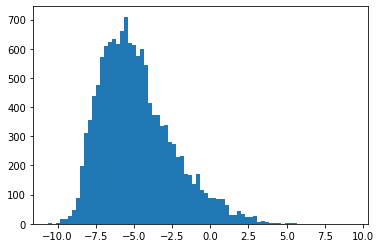

In [9]:
fig1 = plt.hist(100*(df['true_yield_sig'] - df['cor1_yield_sig'])/df['true_yield_sig'], bins='auto')

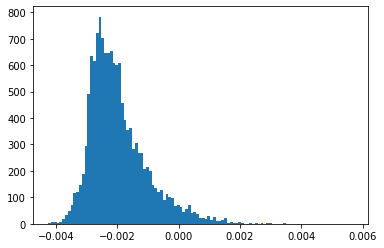

In [10]:
fig2 = plt.hist((df['true_yield_sig'] - df['cor1_yield_sig']), bins='auto')

In [10]:
np.sqrt(0.002336)

0.04833218389437829